# Touch & See Dataset

Every recording session of the dataset is saved as a pickled Neo block. For information about the Neo model for storing neural data, take a look at the [documentation](http://neo.readthedocs.io/en/stable/). Let's begin by loading an example session using `pickle`. 

In [ ]:
import neo
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

file = '/media/pietro/bigdata/neuraldata/toch&see_neo/Taskmaster/2011-12-29_10-31-25' \
       '/TS_session_18_Taskmaster_2011-12-29.pkl'

bl = pickle.load(open(file, 'rb'))


/home/pietro/Envs/basic3/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## A quick overview of the data

Every segment of the block corresponds to a trial. To access the third trial, we could do:

In [2]:
bl.segments[0]

Segment with 2 analogsignals, 1 events, 45 spiketrains
name: 'Trial 1'
annotations: {'t_start': 4210.126049,
  't_stop': 4252.957287,
  'trial_number': 1,
  'trial_outcome': 'correct',
  'trial_side': 'left',
  'trial_type': 'memory'}
# analogsignals (N=2)
0: AnalogSignal with 2 channels of length 1070; units mm; datatype float64 
   name: 'xy position of Trial 1'
   description: 'first column: x positionsecond column: y position'
   annotations: {'t_stop': array(4252.957287) * s,
     'trial_number': 1,
     'trial_outcome': 'correct',
     'trial_side': 'left',
     'trial_start_timestamp': 4231.157975,
     'trial_type': 'memory'}
   sampling rate: 25.000464200526793
   time: 4210.126049 to 4252.9252543034545
1: AnalogSignal with 1 channels of length 1070; units mm/s; datatype float64 
   name: 'Velocity of locomotion of the animal of Trial 1'
   annotations: {'t_stop': array(4252.957287) * s,
     'trial_number': 1,
     'trial_outcome': 'correct',
     'trial_side': 'left',
     '

The segment has several annotations, containing relevant information on the trial. The animals in this experiment perform a spatial navigation task on a figure eight maze. At the beginning of each trial, they are presented with two images, one on the left and one of the right, and have to move along the arm of the maze corresponding to one of the two images. The `trial_outcome` annotation indicates whether they picked the correct side, whereas `trial_side` indicates which arm they picked. `trial_type` can be either normal or `memory`: in the latter, the images disappear slightly before the animal has to make the choice. 

The segment has 45 spiketrains, one for each unit which was recorded during the recording session.

In [3]:
bl.segments[0].spiketrains[1]

SpikeTrain
name: 'Unit 1140 in Trial 1'
annotations: {'area': 'Hippocampus',
  'general_unit_ind': 1140,
  'index': 1,
  'sub_area': '',
  'trial_number': 1,
  'trial_outcome': 'correct',
  'trial_side': 'left',
  'trial_start_timestamp': 4231.157975,
  'trial_type': 'memory'}

Spiketrains are annotated with the area and the trial in which they were recorded, and with the `general_unit_ind` of the unit, which is the index used to univocally identify units across animals. 

We can print the spike train to see the spike times that it contains:

In [4]:
print(bl.segments[0].spiketrains[1])

[4212.022272 4215.972465 4216.149658 4216.156785 4223.038864 4228.280679
 4228.621548 4229.252997 4230.175734 4230.539582 4236.172554 4236.941384
 4237.576612 4240.335022 4241.261138 4241.819658 4242.017434 4242.026312
 4242.139792 4242.377872 4242.400297 4242.404506 4242.488064 4242.491812
 4242.605998 4242.611405 4244.123904 4251.853609] s


Note that the Neo model makes use of quantities, to indicate that the spike times above are expressed in seconds. We can use the `quantities` module to rescale them:

In [5]:
import quantities as pq
print(bl.segments[0].spiketrains[1].rescale(pq.ms))

[4212022.272      4215972.465      4216149.65800003 4216156.78500003
 4223038.86400003 4228280.67899997 4228621.548      4229252.997
 4230175.734      4230539.582      4236172.55399997 4236941.384
 4237576.61200003 4240335.022      4241261.138      4241819.65800003
 4242017.434      4242026.31200003 4242139.792      4242377.872
 4242400.297      4242404.50599997 4242488.06400003 4242491.81200003
 4242605.998      4242611.405      4244123.90399997 4251853.609     ] ms


Every segment (i.e. trial) also has a Neo `AnalogSignal` containing the position of the animal during the trial, estimated with video tracking.

In [6]:
bl.segments[0].analogsignals[0]

AnalogSignal with 2 channels of length 1070; units mm; datatype float64 
name: 'xy position of Trial 1'
description: 'first column: x positionsecond column: y position'
annotations: {'t_stop': array(4252.957287) * s,
  'trial_number': 1,
  'trial_outcome': 'correct',
  'trial_side': 'left',
  'trial_start_timestamp': 4231.157975,
  'trial_type': 'memory'}
sampling rate: 25.000464200526793
time: 4210.126049 to 4252.9252543034545

This is simply an array of x and y position:

In [7]:
print(bl.segments[0].analogsignals[0])

[[165.          66.        ]
 [165.5         66.        ]
 [166.11859882  67.98418795]
 ...
 [171.          66.        ]
 [170.          66.5       ]
 [170.5         66.5       ]] mm


Note that we can also access the times at which each position is 'recorded' (corresponding to the times of acquisition of the frames in the video recording):

In [8]:
bl.segments[0].analogsignals[0].times

array([4210.126049  , 4210.16604826, 4210.20604751, ..., 4252.80525653,
       4252.84525579, 4252.88525505]) * s

A second Neo `AnalogSignal` is available in every segment containing the estimated velocity of locomotion of the animal at every frame during the experiment. 

In [9]:
bl.segments[0].analogsignals[1]

AnalogSignal with 1 channels of length 1070; units mm/s; datatype float64 
name: 'Velocity of locomotion of the animal of Trial 1'
annotations: {'t_stop': array(4252.957287) * s,
  'trial_number': 1,
  'trial_outcome': 'correct',
  'trial_side': 'left',
  'trial_start_timestamp': 4231.157975,
  'trial_type': 'memory'}
sampling rate: 25.000464200526793
time: 4210.126049 to 4252.9252543034545

A segment is also endowed with a Neo `Event`, containing the times of experimentally relevant events which occurred during the trial, with the respective labels. 

In [10]:
print(bl.segments[0].events[0].times)
print(bl.segments[0].events[0].labels)

[4210.126049 4231.157975 4235.448853 4238.229596 4239.048807 4248.491336] s
['ITI', 'Image on', 'Block removed', 'Point of no return', 'Reward', 'Return to central arm']


A description of these events is provided below:
 - __'ITI'__: beginning inter-trial interval, which is initiated by the experimenter and has a random duration. 
 - __'Image on'__: after the ITI, an image appears on each screen. In normal trials, images remain on the screens for 4.2 seconds, whereas in memory trials they are switched off after 2 seconds. 
 - __'Block removed'__: approximately 4.2 seconds after 'Image on', the block which is in front of the animal in the central maze is removed, allowing the animal to start moving into the arms of the maze. 
 - __'Point of no return'__: this corresponds to the animal crossing a beam situated at the top of the arm. When this occurs, a screen is placed onto the maze behind the animal which prevents the animal from going back along the arm (and potentially going to the other side). 
 - __'Reward'__: this event corresponds to the animal crossing the reward beam (which happens in every trial, regardless of whether the animal is actually given a reward).
 - __'Return to central arm'__: this corresponds to the animal crossing a beam situated in the central arm after completion of the trial. 


Recorded units be listed and accessed from the block:

In [11]:
bl.list_units[0]

Unit with 100 spiketrains
name: 'unit 1139'
annotations: {'area': 'Hippocampus',
  'depth': 60.5,
  'general_unit_ind': 1139,
  'layer': 'ds',
  'sess_ind': 16,
  'sub_area': '',
  'tetrode': 1}

Note that the depth is measure along the tetrode axis. The `'tetrode'` field contains the index of the tetrode on which the unit was recorded (as several tetrodes were used in each area). We can also access the spike trains from the unit object (instead of from the segment), thus obtaining the spikes of a unit across all trials:

In [12]:
bl.list_units[0].spiketrains[0:3]

[SpikeTrain
 name: 'Unit 1139 in Trial 1'
 annotations: {'area': 'Hippocampus',
   'general_unit_ind': 1139,
   'index': 1,
   'sub_area': '',
   'trial_number': 1,
   'trial_outcome': 'correct',
   'trial_side': 'left',
   'trial_start_timestamp': 4231.157975,
   'trial_type': 'memory'},
 SpikeTrain
 name: 'Unit 1139 in Trial 2'
 annotations: {'area': 'Hippocampus',
   'general_unit_ind': 1139,
   'index': 2,
   'sub_area': '',
   'trial_number': 2,
   'trial_outcome': 'correct',
   'trial_side': 'right',
   'trial_start_timestamp': 4277.036759,
   'trial_type': 'normal'},
 SpikeTrain
 name: 'Unit 1139 in Trial 3'
 annotations: {'area': 'Hippocampus',
   'general_unit_ind': 1139,
   'index': 3,
   'sub_area': '',
   'trial_number': 3,
   'trial_outcome': 'correct',
   'trial_side': 'left',
   'trial_start_timestamp': 4350.448927,
   'trial_type': 'memory'}]

## Using `filter` to select units, trials, and spike trains
Neo provides a handy `filter` method, which can be used to filter the selection of different objects. For instance, we can select all the units recorded in a certain brain area:

In [13]:
perirhinal_units  = bl.filter(targdict={'area' : 'Perirhinal'},
                              objects=neo.Unit)
hippocampal_units = bl.filter(targdict={'area' : 'Hippocampus'},
                              objects=neo.Unit)
V1_units          = bl.filter(targdict={'area' : 'V1'},
                              objects=neo.Unit)
barrel_units      = bl.filter(targdict={'area' : 'Barrel'},
                              objects=neo.Unit)
perirhinal_units[0]

Unit with 100 spiketrains
name: 'unit 1150'
annotations: {'area': 'Perirhinal',
  'depth': 175.0,
  'general_unit_ind': 1150,
  'layer': '6',
  'sess_ind': 27,
  'sub_area': 'Perirhinal - Area 36',
  'tetrode': 1}

We may also be interested in restricting our attention to trials which are either correct/incorrect, or which occurred on a specific side of the maze. This can be easily achived:

In [14]:
correct_trials = bl.filter(targditct={'trial_outcome' : 'correct'},
                           objects=neo.Segment)
left_trials    = bl.filter(targditct={'trial_side' : 'left'},
                           objects=neo.Segment)

Furthermore, since the spike train objects are annotated with information on the units, we can directly filter the spike trains of a certain trials to obtain all hippocampal cells:

In [15]:
trial = bl.segments[0]
hp_spiketrains = trial.filter(targdict={'area' : 'Hippocampus'},
                              objects=neo.SpikeTrain)

## Plotting spikes in a single trial

To generate a spatial plot of the spikes, we load the maze outline provided in the `maze_outline.pkl` file, and define a simple function which will add the outline to an axis object.

In [16]:
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 200

maze_file = '/media/pietro/bigdata/neuraldata/toch&see_neo/maze_outline.pkl'

mz = pickle.load(open(maze_file, 'rb'))

def plot_maze(ax):
    ax.plot(mz['xaxMInL'], mz['yaxMInL'], c='k')
    ax.plot(mz['xaxMInR'], mz['yaxMInR'], c='k')
    ax.plot(mz['xaxMOut'], mz['yaxMOut'], c='k')

We can then plot the position of the animal on the maze in the course of a single trial, together with the spikes of a few units.

In [17]:
segment = bl.segments[1]

selected_units = [1153, 1146, 1149]
spike_pos = {un : np.empty([0, 2]) for un in selected_units}

# loop over selected units
for unit in selected_units:
    # filter the spike train of the current unit
    train = segment.filter(targdict={'general_unit_ind': unit},
                           objects=neo.SpikeTrain)[0]
    pos  = segment.analogsignals[0].__array__()
    time = segment.analogsignals[0].times

    for spike in train:
        idx_spike = np.abs(time - spike).argmin()
        spike_pos[unit] = np.append(spike_pos[unit], pos[idx_spike, None],
                                    axis=0)

pal = sns.color_palette('husl', len(selected_units))
f, ax = plt.subplots(1, 1, figsize=[10,8])
plot_maze(ax)

ax.plot(pos[:, 0], pos[:, 1], c='gray', zorder=1, alpha=0.5)

for i, unit_ind in enumerate(selected_units):
    unit = bl.filter(targdict={'general_unit_ind': unit_ind}, objects=neo.Unit)[0]
    area = unit.annotations['area']
    ax.scatter(spike_pos[unit_ind][:, 0], spike_pos[unit_ind][:, 1],
               s=15, zorder=2, c=pal[i],
               label='Unit {} - {}'.format(unit_ind, area))
ax.legend()
ax.set_axis_off()


## Plotting spikes across all trials

We can also gather spikes from all trials in the session to analyze the spatial firing fields.

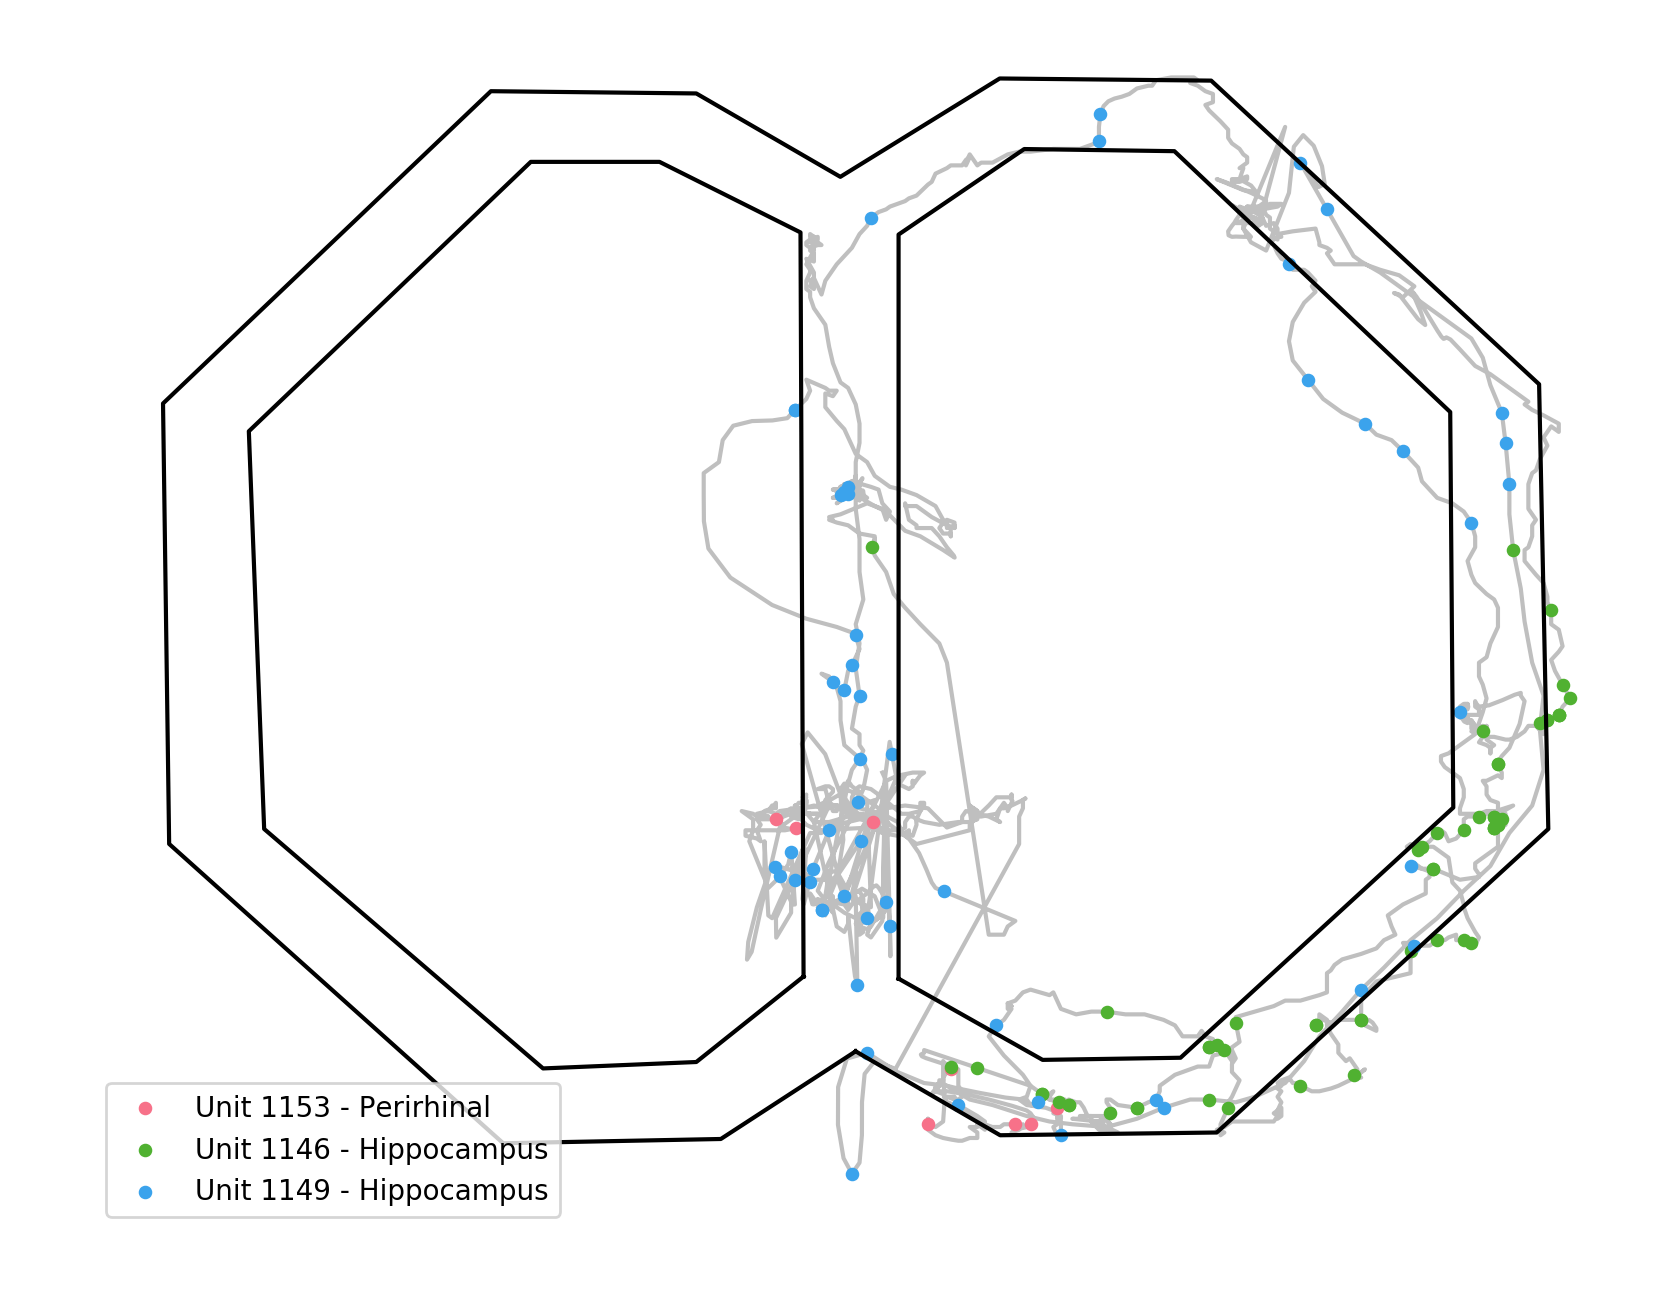

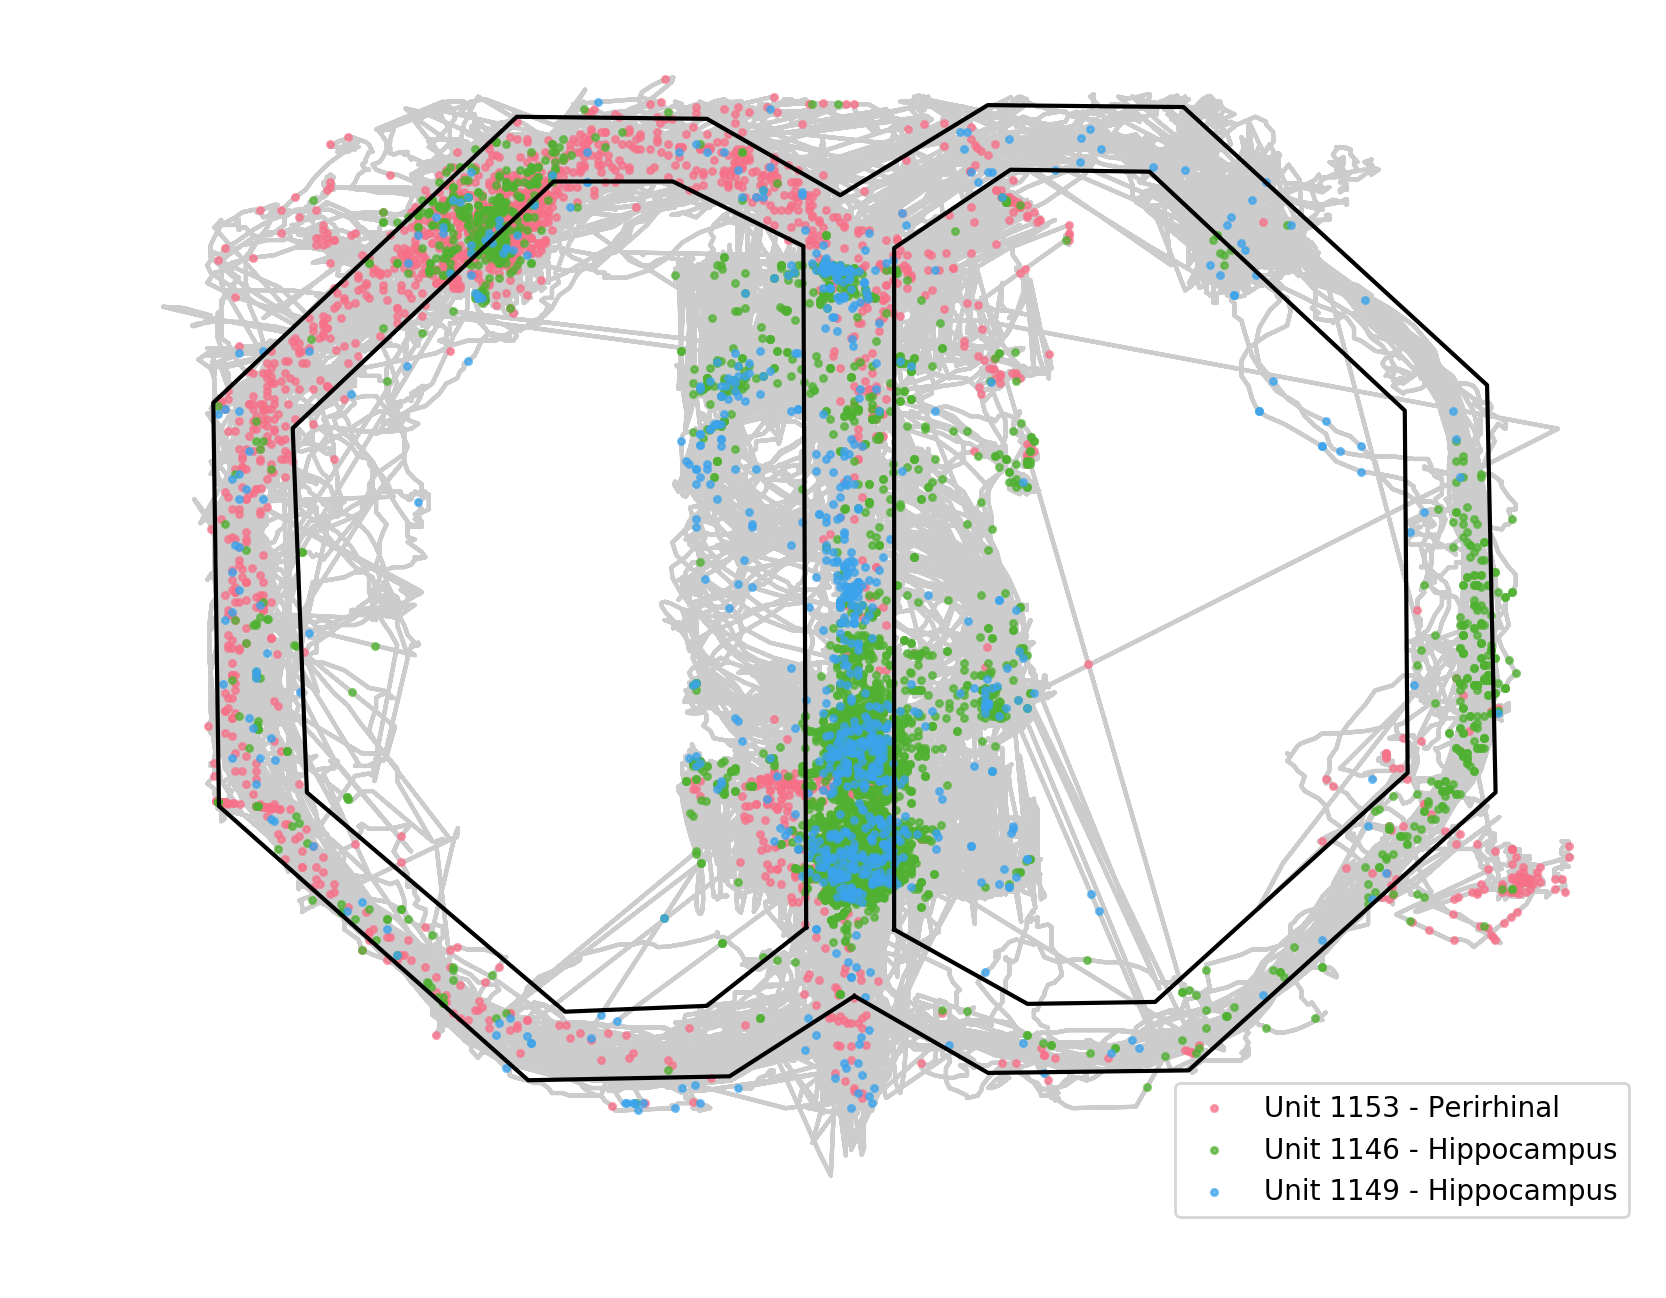

In [18]:
selected_units = [1153, 1146, 1149]
spike_pos = {un : np.empty([0, 2]) for un in selected_units}
pos = np.empty([0, 2])

for unit_ind in selected_units:

    for segment in bl.segments:
        train = segment.filter(targdict={'general_unit_ind': unit_ind},
                               objects=neo.SpikeTrain)[0]
        trial_pos  = segment.analogsignals[0].__array__()
        time = segment.analogsignals[0].times

        for spike in train:
            idx_spike = np.abs(time - spike).argmin()
            spike_pos[unit_ind] = np.append(spike_pos[unit_ind],
                                            trial_pos[idx_spike, None], axis=0)
        pos = np.append(pos, trial_pos, axis=0)


pal = sns.color_palette('husl', len(selected_units))
f, ax = plt.subplots(1, 1, figsize=[10,8])
plot_maze(ax)

ax.plot(pos[:, 0], pos[:, 1], c='gray', zorder=1, alpha=0.4)
for i, unit_ind in enumerate(selected_units):
    unit = bl.filter(targdict={'general_unit_ind': unit_ind}, objects=neo.Unit)[0]
    area = unit.annotations['area']
    ax.scatter(spike_pos[unit_ind][:, 0], spike_pos[unit_ind][:, 1], s=5, zorder=2,
               label='Unit {} - {}'.format(unit_ind, area), c=pal[i], alpha=0.7)
ax.legend()
ax.set_axis_off()
plt.show()

##  Filtering spikes based on the animal's velocity

We can further filter the spikes that we plot to select only the ones fired during locomotion (thus avoiding all the firing which occurs while the animal is consuming the reward or waiting for a new trial to begin). This can easily be achieved using the second analog signal contained in each segment.

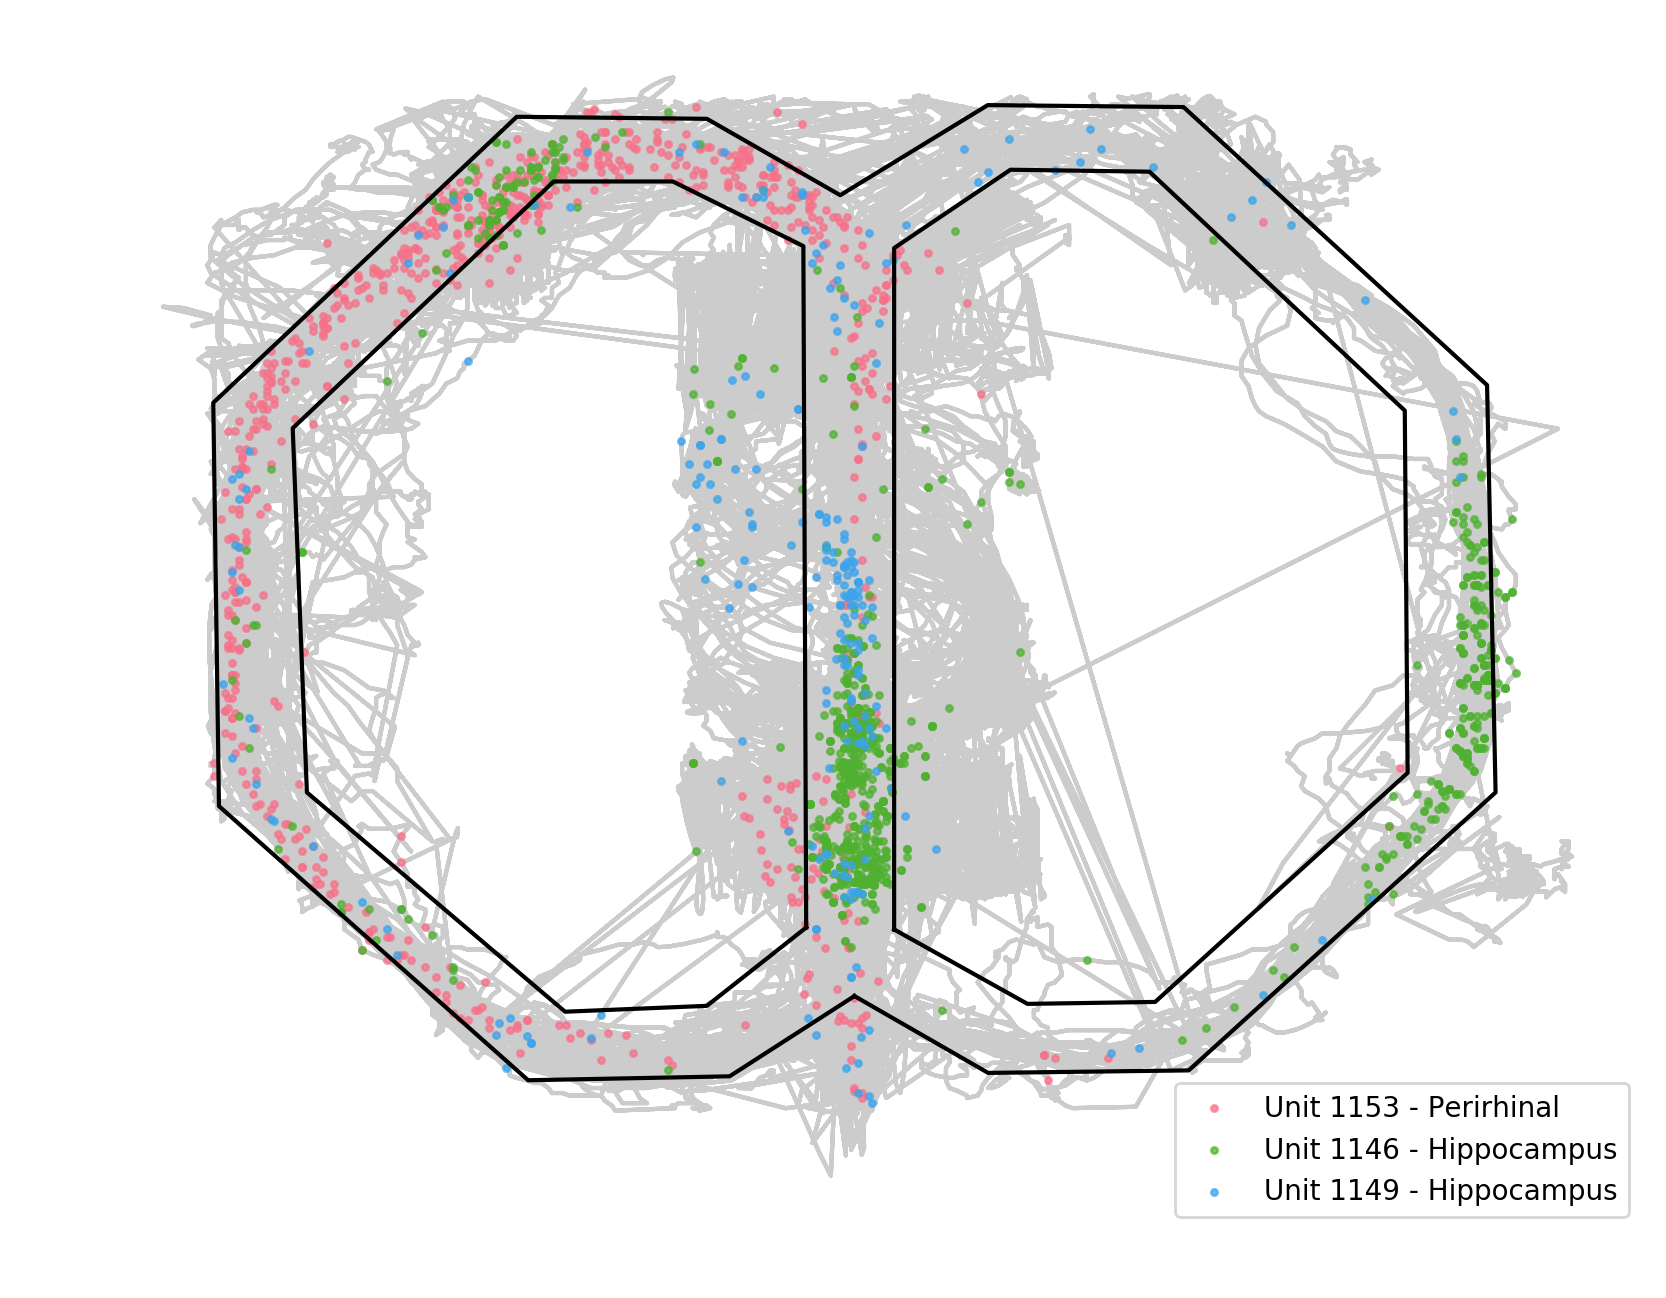

In [19]:
vel_threshold = 0.15
selected_units = [1153, 1146, 1149]
spike_pos = {un : np.empty([0, 2]) for un in selected_units}
pos = np.empty([0, 2])

for unit_ind in selected_units:

    for segment in bl.segments:
        train = segment.filter(targdict={'general_unit_ind': unit_ind},
                               objects=neo.SpikeTrain)[0]
        trial_pos  = segment.analogsignals[0].__array__()
        trial_vel  = segment.analogsignals[1].__array__()
        time = segment.analogsignals[0].times

        for spike in train:
            idx_spike = np.abs(time - spike).argmin()
            # Filter using velocity
            if trial_vel[idx_spike] > vel_threshold:
                spike_pos[unit_ind] = np.append(spike_pos[unit_ind],
                                                trial_pos[idx_spike, None], axis=0)
        pos = np.append(pos, trial_pos, axis=0)


pal = sns.color_palette('husl', len(selected_units))
f, ax = plt.subplots(1, 1, figsize=[10,8])
plot_maze(ax)

ax.plot(pos[:, 0], pos[:, 1], c='gray', zorder=1, alpha=0.4)
for i, unit_ind in enumerate(selected_units):
    unit = bl.filter(targdict={'general_unit_ind': unit_ind}, objects=neo.Unit)[0]
    area = unit.annotations['area']
    ax.scatter(spike_pos[unit_ind][:, 0], spike_pos[unit_ind][:, 1], s=5, zorder=2,
               label='Unit {} - {}'.format(unit_ind, area), c=pal[i], alpha=0.7)
ax.legend()
ax.set_axis_off()
plt.show()